# Keras Softmax for CIFAR10 test
a softmax network for CIFAR10 classfier test, correspoding to CS231n assignment1 softmax part.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf 
from keras import backend as k
import os
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
k.tensorflow_backend.set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


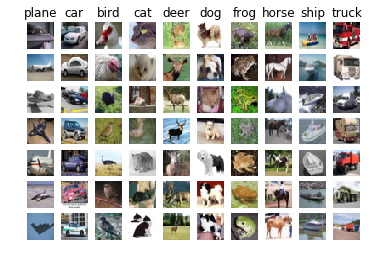

In [2]:
cifar10_data = CIFAR10Data()
plot_cifar10(cifar10_data, 7)

In [3]:
# get stretch data
x_train, y_train, x_test, y_test = cifar10_data.get_stretch_data(subtract_mean=True)

# Subsample data for more efficient code execution
num_training = 5000

mask = list(range(num_training))
x_small_train = x_train[mask]
y_small_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
x_small_test = x_train[mask]
y_small_test = y_test[mask]


# Softmax test
here we use softmax classifier for cifar10

In [7]:
# training 
from classifiers.linear_softmax import softmax
from keras.optimizers import SGD

num_classes = 10
N, D = x_train.shape
softmax_model = softmax(num_classes, input_shape=(D,), weight_decay=2.5e4)
# softmax_model.add(Dense(10, 
#                         input_shape=(3072,),
#                         kernel_regularizer=keras.regularizers.l2(2.5e4),
#                         kernel_initializer=keras.initializers.random_normal(stddev=1e-3),
#                         ))
# softmax_model.add(Activation('softmax'))

opt = SGD(lr=1e-7)
softmax_model.compile(optimizer=opt,
                      loss=keras.losses.categorical_crossentropy,
                      metrics=['accuracy'],
                      )
softmax_model.summary()
history = softmax_model.fit(x_train, y_train,
                            epochs=3, batch_size=128,
                            validation_split=0.02, shuffle=True,
                            )
# Test loss is euqal log(C)
# loss, acc = softmax_model.train_on_batch(x_small_train, y_small_train)
# print(loss, acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Train on 49000 samples, validate on 1000 samples
Epoch 1/3
49000/49000 [==============================] - 3s 69us/step - loss: 202.5288 - acc: 0.2027 - val_loss: 18.7858 - val_acc: 0.2800
Epoch 2/3
49000/49000 [==============================] - 3s 65us/step - loss: 6.3533 - acc: 0.3160 - val_loss: 2.4480 - val_acc: 0.3290
Epoch 3/3
49000/49000 [==============================] - 3s 65us/step - loss: 2.1778 - acc: 0.3266 - val_loss: 2.0970 - val_acc: 0.3460


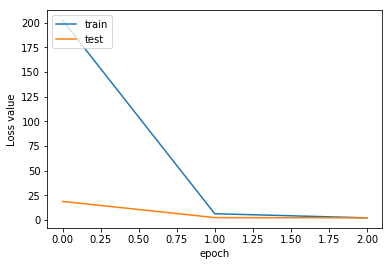

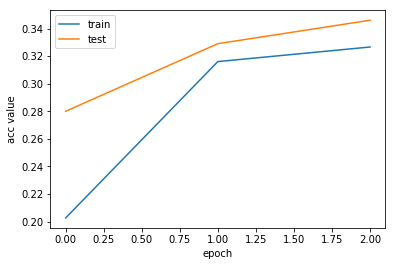

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc value')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [10]:

# evalute SVM model
loss, acc = softmax_model.evaluate(x_test, y_test)
print('evaluate loss:%f acc:%f' % (loss, acc))

10000/10000 [==============================] - 1s 79us/step
evaluate loss:2.090912 acc:0.331100
